In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [65]:
#IMPORT THE DATA AS 'data'
data = pd.read_csv("WEEK4.csv")

In [66]:
data.head()

,price,year,mileage,color,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,...,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552.0,silver,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590.0,silver,2,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146.0,blue,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654.0,red,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561.0,white,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [67]:
data.columns

Index(['price', 'year', 'mileage', 'color', 'AGE_IN_YEARS', 'chevrolet',
       'dodge', 'gmc', 'jeep', 'nissan', 'salvage insurance', 'black', 'blue',
       'gray', 'no_color', 'silver', 'white', 'Goa', 'MP', 'Maharashtra',
       'UP'],
      dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 21 columns):
price                2153 non-null int64
year                 2153 non-null int64
mileage              2153 non-null float64
color                2153 non-null object
AGE_IN_YEARS         2153 non-null int64
chevrolet            2153 non-null int64
dodge                2153 non-null int64
gmc                  2153 non-null int64
jeep                 2153 non-null int64
nissan               2153 non-null int64
salvage insurance    2153 non-null int64
black                2153 non-null int64
blue                 2153 non-null int64
gray                 2153 non-null int64
no_color             2153 non-null int64
silver               2153 non-null int64
white                2153 non-null int64
Goa                  2153 non-null int64
MP                   2153 non-null int64
Maharashtra          2153 non-null int64
UP                   2153 non-null int64
dtypes: float64(1), int64(19)

ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [69]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [70]:
# VIEWING THE DATA ONCE
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [71]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

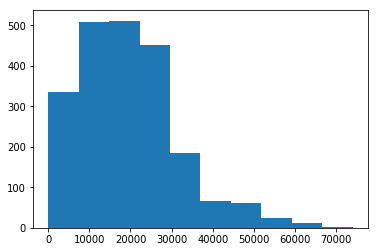

In [72]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

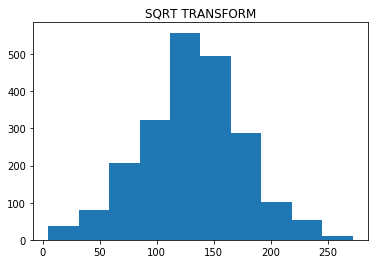

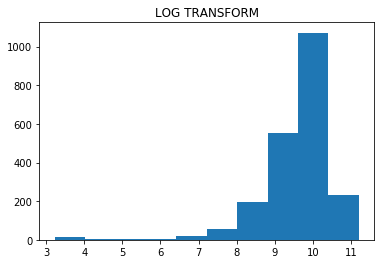

In [73]:
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [74]:
#CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [75]:
#SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [76]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 25)
(431, 25)
(1722,)
(431,)

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))




print("Linear Regression Training mean_squared_error is" +" "+ str(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_squared_error is" + " "+str(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test)))))


print('Linear Regression Training mean_absolute_error is '+str(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_absolute_error is "+str(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test)))))


print("\n")
print("The correct values are :")


print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.35779358066728983
Linear Regression Testing R2 score is 0.3340597013410297
Linear Regression Training mean_squared_error is 90997459.2403794
Linear Regression Testing mean_squared_error is 93998879.06677794
Linear Regression Training mean_absolute_error is 6864.98050501777
Linear Regression Testing mean_absolute_error is 6926.987292556897


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [78]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data



dst=DecisionTreeRegressor(criterion='mse', max_depth=7, random_state= 1)
dst.fit(X_train,y_train)


print("Decision tree regressor training r2 score is " + str(r2_score(np.square(y_train),np.square(dst.predict(X_train)))))
print("Decision tree regressor testing r2 score is " + str(r2_score(np.square(y_test), np.square(dst.predict(X_test)))))

print("Decision tree regressor training mean_squared_error is "+str(mean_squared_error(np.square(y_train),np.square(dst.predict(X_train)))))
print("Decision tree regressor testing mean_squared_error is " + str(mean_squared_error(np.square(y_test),np.square(dst.predict(X_test)))))

print("Decision tree regressor training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(dst.predict(X_train)))))
print("Decision tree regressor testing mean_absolute_error is "+str(mean_absolute_error(np.square(y_test),np.square(dst.predict(X_test)))))



Decision tree regressor training r2 score is 0.422869230755335
Decision tree regressor testing r2 score is 0.36145560633416207
Decision tree regressor training mean_squared_error is 81776562.90835412
Decision tree regressor testing mean_squared_error is 90131889.2396716
Decision tree regressor training mean_absolute_error is 6266.244817595775
Decision tree regressor testing mean_absolute_error is 6846.025816839579


<br>NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [79]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.


sv=SVR(kernel='poly', degree=2, max_iter=3000,C=0.1,)
sv.fit(X_train,y_train)


print("SVR training r2 score is "+str(r2_score(np.square(y_train),np.square(sv.predict(X_train)))))
print("SVR testing r2 score is "+str(r2_score(np.square(y_test),np.square(sv.predict(X_test)))))

print("SVR training mean squared error is "+str(mean_squared_error(np.square(y_train),np.square(sv.predict(X_train)))))
print("SVR testing mean squared error is "+str(mean_squared_error(np.square(y_test),np.square(sv.predict(X_test)))))

print("SVR training mean absolute error is "+str(mean_absolute_error(np.square(y_train),np.square(sv.predict(X_train)))))
print("SVR testing mean absolute error is "+str(mean_absolute_error(np.square(y_test),np.square(sv.predict(X_test)))))


SVR training r2 score is -1.2668220735156703e+30
SVR testing r2 score is -1.2792018213442112e+27
SVR training mean squared error is 1.7950239444715493e+38
SVR testing mean squared error is 1.8056203769117988e+35
SVR training mean absolute error is 7.116532563535954e+17
SVR testing mean absolute error is 3.513267417707484e+17


C:\Users\kundan\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [80]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.


rfr= RandomForestRegressor(n_estimators=200, max_depth=9,n_jobs=-1,random_state=1)
rfr.fit(X_train,y_train)

print("rfr training r2 score is "+str(r2_score(np.square(y_train),np.square(rfr.predict(X_train)))))
print("rfr testing r2 score is "+str(r2_score(np.square(y_test),np.square(rfr.predict(X_test)))))

print("rfr training mean_squared_error score is "+str(mean_squared_error(np.square(y_train),np.square(rfr.predict(X_train)))))
print("rfr testing mean_squared_error score is "+str(mean_squared_error(np.square(y_test),np.square(rfr.predict(X_test)))))

print("rfr training mean_absolute_error is "+str(mean_absolute_error(np.square(y_train),np.square(rfr.predict(X_train)))))
print("rfr testing mean_absolute_error is "+str(mean_absolute_error(np.square(y_test),np.square(rfr.predict(X_test)))))


rfr training r2 score is 0.5524364393379151
rfr testing r2 score is 0.3997413290406362
rfr training mean_squared_error score is 63417533.12143005
rfr testing mean_squared_error score is 84727778.65210524
rfr training mean_absolute_error is 5528.669046457424
rfr testing mean_absolute_error is 6695.668840563838


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [81]:
#FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [82]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1


In [83]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


from sklearn.metrics import accuracy_score
from sklearn import metrics

[[782 231]
 [248 461]]
accuracy    0.721835075493612
[0.         0.22803554 1.        ]
[0.         0.65021157 1.        ]
[2. 1. 0.]
0.721835075493612


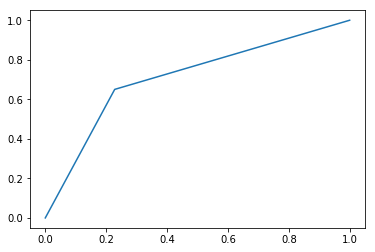

In [86]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# USE THE IMPORTED CONFUSION MATRIX


lr= LogisticRegression(solver='lbfgs', max_iter=2000, C=0.5, penalty='l2', random_state=1)
lr.fit(X_train,y_train)

cnf_matrix=confusion_matrix(y_train, lr.predict(X_train))
print(cnf_matrix)
print("accuracy    " + str(accuracy_score(y_train, lr.predict(X_train))))

fpr, tpr, threshold = metrics.roc_curve(y_train,lr.predict(X_train))
print(fpr)
print(tpr)
print(threshold)

print(lr.score(X_train, y_train))

plt.plot(fpr,tpr)



In [96]:
# FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
# FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
# TP = np.diag(cnf_matrix)
# TN = cnf_matrix.sum() - (FP + FN + TP)

FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP = cnf_matrix[1,1]
TN = cnf_matrix[0,0]

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP  ' +str(FP))
print('FN  ' +str(FN))
print('TP  ' +str(TP))
print('TN  ' +str(TN))
print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))

FP  231.0
FN  248.0
TP  461.0
TN  782.0
TPR  0.6502115655853314
TNR  0.771964461994077
PPV  0.6661849710982659
NPV  0.7592233009708738
FPR  0.228035538005923
FNR  0.34978843441466856
FDR  0.3338150289017341
ACC  0.721835075493612


In [97]:


cnf_matrix_testing=confusion_matrix(y_test, lr.predict(X_test))
print(cnf_matrix_testing)

FP = cnf_matrix_testing[0,1]
FN = cnf_matrix_testing[1,0]
TP = cnf_matrix_testing[1,1]
TN = cnf_matrix_testing[0,0]

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP  ' +str(FP))
print('FN  ' +str(FN))
print('TP  ' +str(TP))
print('TN  ' +str(TN))
print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))

[[188  55]
 [ 65 123]]
FP  55.0
FN  65.0
TP  123.0
TN  188.0
TPR  0.6542553191489362
TNR  0.7736625514403292
PPV  0.6910112359550562
NPV  0.7430830039525692
FPR  0.22633744855967078
FNR  0.34574468085106386
FDR  0.3089887640449438
ACC  0.7215777262180975


In [112]:
a=1/(len(X_train.columns)*X_train.var())
a

year                 4.813090e-03
mileage              1.684115e-11
AGE_IN_YEARS         3.279785e-02
chevrolet            3.673321e-01
dodge                2.642263e-01
gmc                  2.065488e+00
jeep                 3.864844e+00
nissan               3.321253e-01
salvage insurance    9.978323e-01
black                2.298689e-01
blue                 6.981917e-01
gray                 2.919190e-01
no_color             1.537596e+00
silver               3.559834e-01
white                1.859090e-01
Goa                  2.661573e-01
MP                   2.402968e-01
Maharashtra          2.522825e-01
UP                   2.342292e-01
black                2.298689e-01
blue                 6.981917e-01
gray                 2.919190e-01
no_color             1.537596e+00
red                  5.283584e-01
silver               3.559834e-01
dtype: float64

In [136]:
num_features=len(X_train.columns)
num_features

25

In [137]:
a = X_train.var().sum()*num_features
a

59378371386.76001

In [138]:
g = 1/a
g

1.6841149001654443e-11

In [139]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USE THE IMPORTED CONFUSION MATRIX


svm = SVC(kernel='rbf', max_iter = 1000,gamma=g, random_state= 1)
svm.fit(X_train,y_train)

c1 = metrics.confusion_matrix(y_train,svm.predict(X_train))
print(c1)

TP=c1[1,1]
TN=c1[0,0]
FP=c1[0,1]
FN=c1[1,0]

print("TP  " +str(TP))
print("TN  " +str(TN))
print("FP  "+str(FP))
print("FN  "+str(FN))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))
print()



[[730 283]
 [247 462]]
TP  462
TN  730
FP  283
FN  247
TPR  0.6516220028208745
TNR  0.7206317867719645
PPV  0.6201342281879194
NPV  0.7471852610030706
FPR  0.2793682132280355
FNR  0.34837799717912554
FDR  0.37986577181208053
ACC  0.6922183507549361



In [140]:
#SVM for testing data



c9 = metrics.confusion_matrix(y_test,svm.predict(X_test))
print(c9)

TP=c9[1,1]
TN=c9[0,0]
FP=c9[0,1]
FN=c9[1,0]

print("TP  " +str(TP))
print("TN  " +str(TN))
print("FP  "+str(FP))
print("FN  "+str(FN))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))
print()



[[183  60]
 [ 58 130]]
TP  130
TN  183
FP  60
FN  58
TPR  0.6914893617021277
TNR  0.7530864197530864
PPV  0.6842105263157895
NPV  0.7593360995850622
FPR  0.24691358024691357
FNR  0.30851063829787234
FDR  0.3157894736842105
ACC  0.7262180974477959



In [100]:

# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USE THE IMPORTED CONFUSION MATRIX

dt=DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=1)
dt.fit(X_train,y_train)


c2 = metrics.confusion_matrix(y_train,dt.predict(X_train))
print(c2)

TP=c2[1,1]
TN=c2[0,0]
FP=c2[0,1]
FN=c2[1,0]

print("TP  " +str(TP))
print("TN  " +str(TN))
print("FP  "+str(FP))
print("FN  "+str(FN))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))



[[889 124]
 [324 385]]
TP  385
TN  889
FP  124
FN  324
TPR  0.5430183356840621
TNR  0.8775913129318855
PPV  0.756385068762279
NPV  0.7328936521022259
FPR  0.12240868706811452
FNR  0.45698166431593795
FDR  0.24361493123772102
ACC  0.7398373983739838


In [101]:
#for decision tree testing data

c3 = metrics.confusion_matrix(y_test,dt.predict(X_test))
print(c3)

TP=c3[1,1]
TN=c3[0,0]
FP=c3[0,1]
FN=c3[1,0]

print("TP  " +str(TP))
print("TN  " +str(TN))
print("FP  "+str(FP))
print("FN  "+str(FN))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))


[[215  28]
 [ 82 106]]
TP  106
TN  215
FP  28
FN  82
TPR  0.5638297872340425
TNR  0.8847736625514403
PPV  0.7910447761194029
NPV  0.7239057239057239
FPR  0.11522633744855967
FNR  0.43617021276595747
FDR  0.208955223880597
ACC  0.7447795823665894


In [102]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USE THE IMPORTED CONFUSION MATRIX



rf= RandomForestClassifier(n_estimators= 100, max_depth= 3, criterion= 'gini', random_state= 1)
rf.fit(X_train,y_train)


c4 = metrics.confusion_matrix(y_train,rf.predict(X_train))
print(c4)

TP=c4[1,1]
TN=c4[0,0]
FP=c4[0,1]
FN=c4[1,0]

print("TP  " +str(TP))
print("TN  " +str(TN))
print("FP  "+str(FP))
print("FN  "+str(FN))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))



[[891 122]
 [323 386]]
TP  386
TN  891
FP  122
FN  323
TPR  0.5444287729196051
TNR  0.8795656465942744
PPV  0.7598425196850394
NPV  0.7339373970345964
FPR  0.12043435340572557
FNR  0.45557122708039494
FDR  0.24015748031496062
ACC  0.7415795586527294


In [94]:
#for random forest testing data

c5 = metrics.confusion_matrix(y_test,rf.predict(X_test))
print(c5)

TP=c5[1,1]
TN=c5[0,0]
FP=c5[0,1]
FN=c5[1,0]

print("TP  " +str(TP))
print("TN  " +str(TN))
print("FP  "+str(FP))
print("FN  "+str(FN))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('TPR  ' +str(TPR))
print('TNR  ' +str(TNR))
print('PPV  ' +str(PPV))
print('NPV  ' +str(NPV))
print('FPR  ' +str(FPR))
print('FNR  ' +str(FNR))
print('FDR  ' +str(FDR))
print('ACC  ' +str(ACC))


[[214  29]
 [ 82 106]]
TP  106
TN  214
FP  29
FN  82
TPR  0.5638297872340425
TNR  0.8806584362139918
PPV  0.7851851851851852
NPV  0.722972972972973
FPR  0.11934156378600823
FNR  0.43617021276595747
FDR  0.21481481481481482
ACC  0.7424593967517401
